In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_excel("Credit Card Customer Data.xlsx")
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [48]:
df.shape

(660, 7)

In [49]:
df['Customer Key'].nunique()

655

In [50]:
## duplicate rows in dataframe
df[df.duplicated(['Customer Key'])]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
332,333,47437,17000,7,3,1,0
398,399,96929,67000,6,2,2,2
432,433,37252,59000,6,2,1,2
541,542,50706,60000,7,5,2,2
632,633,97935,187000,7,1,7,0


In [51]:
df=df.iloc[:,2:]
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 25.8 KB


In [53]:
df.isnull().sum()

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


{'whiskers': [<matplotlib.lines.Line2D at 0x10254ec8>,
 'caps': [<matplotlib.lines.Line2D at 0x6493250>,
 'boxes': [<matplotlib.lines.Line2D at 0x10254d00>],
 'medians': [<matplotlib.lines.Line2D at 0x64935b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x6493718>],
 'means': []}

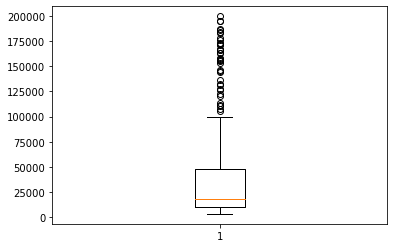

In [55]:
plt.boxplot(df['Avg_Credit_Limit'])

{'whiskers': [<matplotlib.lines.Line2D at 0xac50a48>,
 'caps': [<matplotlib.lines.Line2D at 0xac50130>,
 'boxes': [<matplotlib.lines.Line2D at 0xac50790>],
 'medians': [<matplotlib.lines.Line2D at 0xac46af0>],
 'fliers': [<matplotlib.lines.Line2D at 0xac46ef8>],
 'means': []}

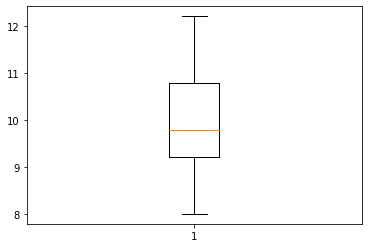

In [56]:
df['Avg_Credit_Limit']=np.log(df['Avg_Credit_Limit'])
plt.boxplot(df['Avg_Credit_Limit'])

In [57]:
df.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

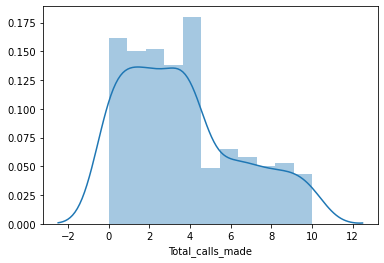

In [65]:
sns.distplot(df['Total_calls_made'])

{'whiskers': [<matplotlib.lines.Line2D at 0x658d6e8>,
 'caps': [<matplotlib.lines.Line2D at 0x658da48>,
 'boxes': [<matplotlib.lines.Line2D at 0x658d538>],
 'medians': [<matplotlib.lines.Line2D at 0x658dda8>],
 'fliers': [<matplotlib.lines.Line2D at 0x658df28>],
 'means': []}

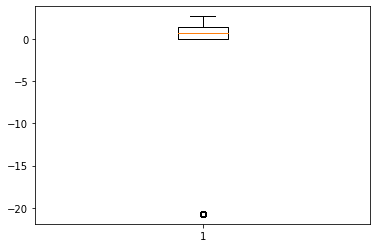

In [61]:
df['Total_visits_online'].replace(0,0.000000001,inplace=True)
df['Total_visits_online']=np.log(df['Total_visits_online'])
plt.boxplot(df['Total_visits_online'])


{'whiskers': [<matplotlib.lines.Line2D at 0x6638550>,
 'caps': [<matplotlib.lines.Line2D at 0x66388c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x66383a0>],
 'medians': [<matplotlib.lines.Line2D at 0x6638c28>],
 'fliers': [<matplotlib.lines.Line2D at 0x6638da8>],
 'means': []}

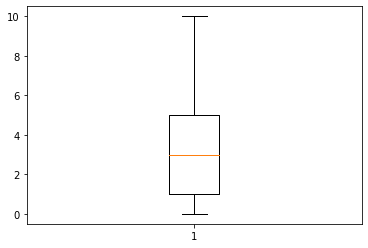

In [63]:
plt.boxplot(df['Total_calls_made'])

In [64]:
## scale/Normalise the data
from scipy.stats import zscore
df_z=df.apply(zscore)
df_z.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.630478,-1.249225,-0.860451,0.422863,-1.251537
1,0.885387,-0.787585,-1.473731,0.679677,1.891859
2,0.885387,1.058973,-0.860451,0.545394,0.145528
3,0.336281,0.135694,-0.860451,0.422863,0.145528
4,1.630478,0.597334,-1.473731,0.700012,-0.203739


Univariate Analysis

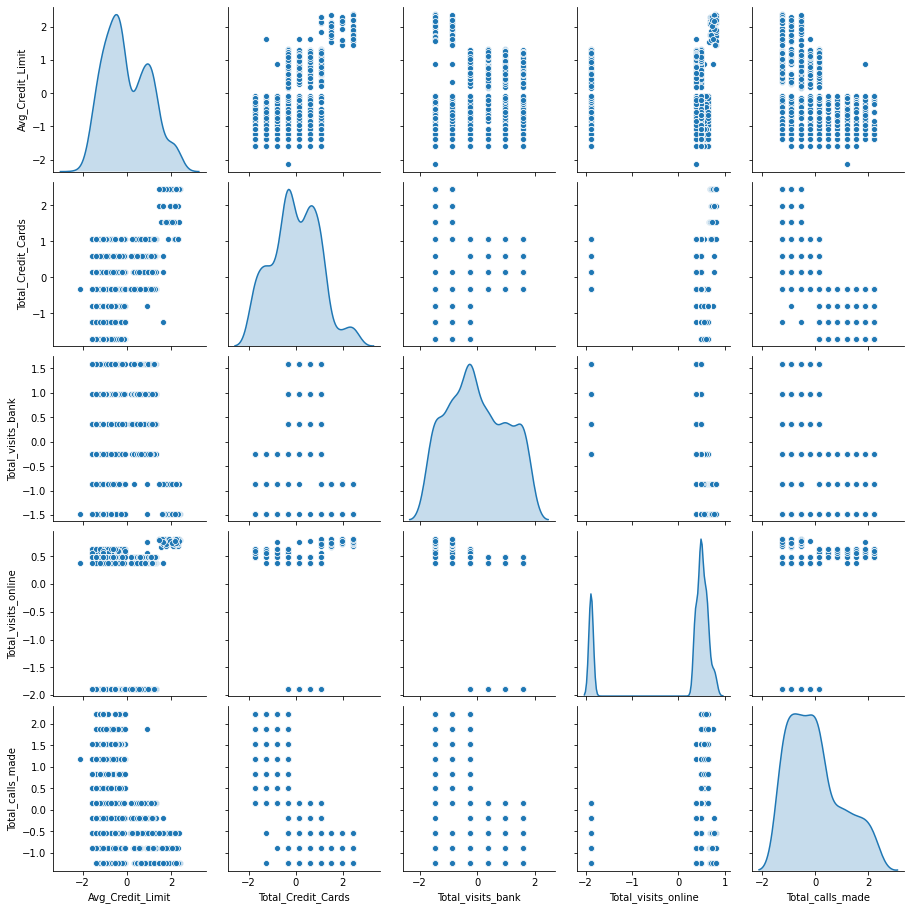

In [47]:
sns.pairplot(df_z,diag_kind='kde')

From the above pairplot, its intuitive to have atleast 4 or 5 clusters


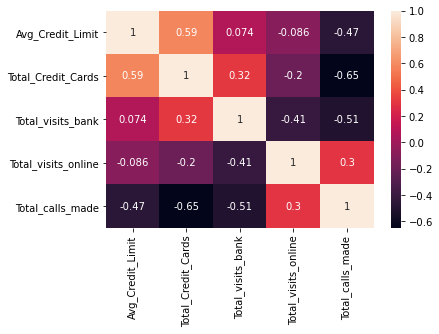

In [48]:
corr_df=df_z.corr()
sns.heatmap(corr_df,annot=True)

The positive relationship between Avg_credit_limit and Total_Credit_Cards is positive, which is obvious that, if the customer has more number of credit cards, then his credit limit is likely to be high.
All other features seems to be reasonably independant of each other

## Unsupervised Learning
## K Means Clustering 

In [66]:
from sklearn.cluster import KMeans
## Finding the optimal k
n_clusters=range(1,18)
cluster_error=[]
for cluster in n_clusters:
    k_means=KMeans(cluster,random_state=30)
    k_means.fit(df_z)
    error=k_means.inertia_
    cluster_error.append(error)
    

Text(0, 0.5, 'Average In-Cluster distortion')

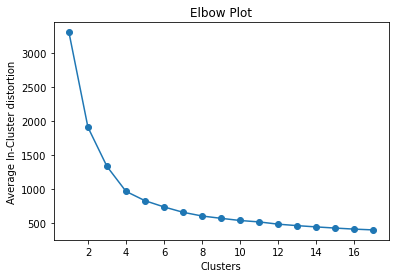

In [67]:
## Elbow plot
plt.plot(n_clusters,cluster_error,marker='o')
plt.title('Elbow Plot')
plt.xlabel("Clusters")
plt.ylabel("Average In-Cluster distortion")

In [84]:
## From the above plot, k=4 or k=5 is optimal
#Lets try with k=4
k_means=KMeans(n_clusters=4,random_state=50,n_init=5)
k_means.fit(df_z)
label=k_means.labels_
centers=k_means.cluster_centers_


In [85]:
## Cluster Centroids
kmeans_center=pd.DataFrame(centers,columns=list(df_z))
kmeans_center.T

,0,1,2,3
Avg_Credit_Limit,0.200996,-0.735331,1.891659,0.130227
Total_Credit_Cards,0.382543,-1.060843,1.789203,0.349057
Total_visits_bank,0.677009,-0.904453,-1.038859,0.677903
Total_visits_online,-1.888465,0.556775,0.666450,0.466905
Total_calls_made,-0.528750,1.152605,-0.807017,-0.573550


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10F28400>,
      dtype=object)

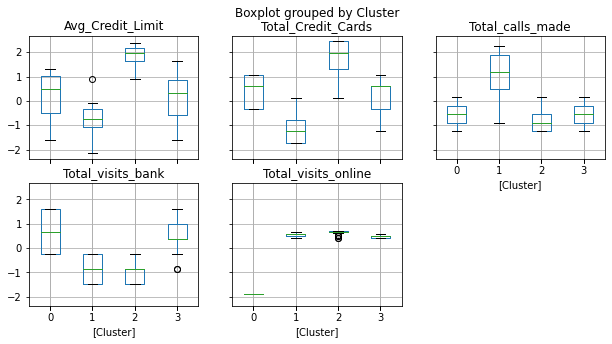

In [86]:
## Analysing the clusters with boxplot
df_kmeans=df_z.copy()
df_kmeans['Cluster']=label
df_kmeans.boxplot(by='Cluster',layout=(2,3),figsize=(10,5))

In [90]:
df_kmeans.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster
0,1.630478,-1.249225,-0.860451,0.422863,-1.251537,3
1,0.885387,-0.787585,-1.473731,0.679677,1.891859,1
2,0.885387,1.058973,-0.860451,0.545394,0.145528,2
3,0.336281,0.135694,-0.860451,0.422863,0.145528,3
4,1.630478,0.597334,-1.473731,0.700012,-0.203739,2


In [87]:
## cluster analysis
# Group 2 is characterised by high Credit limits and high number of total credit cards
# Group 

In [88]:
## Silhoutte score for KMeans model
from sklearn.metrics import silhouette_score
s_kmeans=silhouette_score(df_z,label)
print(s_kmeans)

0.4457644337321476


In [92]:
# Hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
model_hier=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='average')
model_hier.fit(df_z)
label=model_hier.labels_
df_hier=df_z.copy()
df_hier['Cluster']=label
df_hier.head()


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster
0,1.630478,-1.249225,-0.860451,0.422863,-1.251537,0
1,0.885387,-0.787585,-1.473731,0.679677,1.891859,2
2,0.885387,1.058973,-0.860451,0.545394,0.145528,0
3,0.336281,0.135694,-0.860451,0.422863,0.145528,0
4,1.630478,0.597334,-1.473731,0.700012,-0.203739,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10A2B6A0>,
      dtype=object)

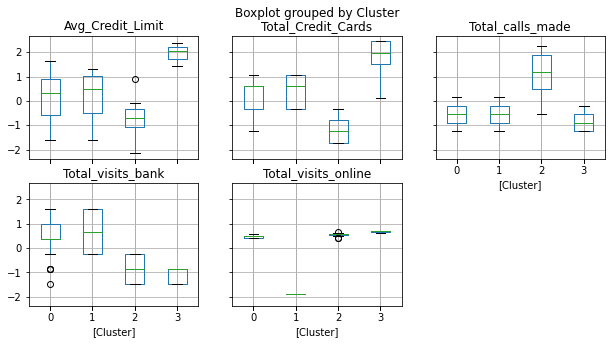

In [94]:
## Analysing the clusters with boxplot

df_hier.boxplot(by='Cluster',layout=(2,3),figsize=(10,5))

In [97]:
## Silhouette score for hierarchical clustering
from sklearn.metrics import silhouette_score
s_hier=silhouette_score(df_z,label,metric='euclidean',random_state=50)
print(s_hier)

0.4462923561903839


In [100]:
## cophenetic coeff
from scipy.cluster.hierarchy import cophenet,linkage,dendrogram
from scipy.spatial.distance import pdist
Z=linkage(df_z,metric='euclidean',method='average')
c,c_dis=cophenet(Z,pdist(df_z))
c

0.803509709739939

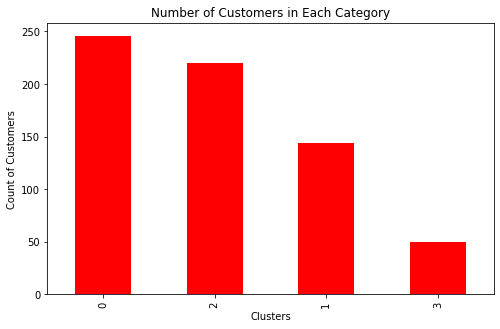

In [103]:
plt.figure(figsize=(8,5))
df_hier['Cluster'].value_counts().plot.bar(color='red')
plt.xlabel("Clusters")
plt.ylabel("Count of Customers")
plt.title("Number of Customers in Each Category")
plt.show()


In [ ]:
## Cluster 0 has the highest number of customers and cluster 3 has the lowest number of customers


In [108]:
## Assigning the labels to the original dataset
df['Cluster']=label

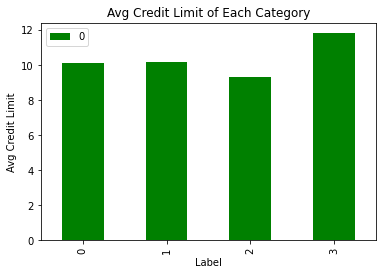

In [109]:
zero = df[df['Cluster'] == 0].Avg_Credit_Limit.mean()
one = df[df['Cluster'] == 1].Avg_Credit_Limit.mean()
two = df[df['Cluster'] == 2].Avg_Credit_Limit.mean()
three = df[df['Cluster'] == 3].Avg_Credit_Limit.mean()


indices = ['0','1','2', '3']
bar = pd.DataFrame([zero, one, two, three], index = indices)
bar.plot.bar(color='green')
plt.xlabel('Label')
plt.ylabel('Avg Credit Limit')
plt.title("Avg Credit Limit of Each Category")
plt.show()

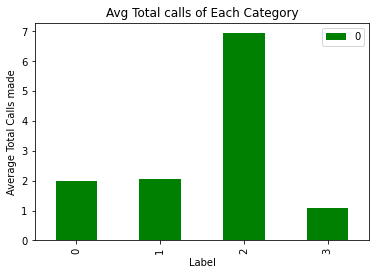

In [110]:
zero = df[df['Cluster'] == 0].Total_calls_made.mean()
one = df[df['Cluster'] == 1].Total_calls_made.mean()
two = df[df['Cluster'] == 2].Total_calls_made.mean()
three = df[df['Cluster'] == 3].Total_calls_made.mean()


indices = ['0','1','2', '3']
bar = pd.DataFrame([zero, one, two, three], index = indices)
bar.plot.bar(color='green')
plt.xlabel('Label')
plt.ylabel('Average Total Calls made')
plt.title("Avg Total calls of Each Category")
plt.show()

In [ ]:
## The label 3 cactegory has the highest Avg Credit limit, while the number of customers in label 3 as  shown above is the lowest
## Inference: We can observe that the number of cuatomers with high Avg Credit limit are clustered into one category
## The label 2 category has the highest Total Calls made, while the average credit limit in label 2 is the lowest.
## inference: We can observe that the customers with lowest Credit limit and highest total calls made are clustered into one category
